<h3><center>M4 Practical Challenge: Feature Selection & Dimension Reduction
    <br>By Anna Imhoff and Randy Leon</h3></center>

<h3><b>Introduction</b></h3>

The [Online News Popularity Data Set](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity) used for this exercise is part of the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php).  First, we will upload the data set to our Github repository.  The original data set contains 39,644 observations and 61 attributes.  The response variable will be the number of shares.  Exploratory data analysis will be performed on the variables to familiarize us with the online news data set, identify trends and missing data, and gather preliminary predictive inferences.  The number of explanatory variables is relatively large with respect to the number of observations contained within a data set.  We will apply feature selection and/or dimensionality reduction techniques to identify the explanatory variables to be included within a linear regression model that predicts the number of times an online news article will be shared.

Data Dictionary

1) url: URL of the article (non-predictive) <br>
2) timedelta: Days between the article publication and the dataset acquisition (non-predictive) <br>
3) n_tokens_title: Number of words in the title <br>
4) n_tokens_content: Number of words in the content <br>
5) n_unique_tokens: Rate of unique words in the content <br>
6) n_non_stop_words: Rate of non-stop words in the content <br>Stopw ords are the most common words in any natural language.  They might not add much value to the meaning of the document.  Generally, the most common stop words used in a text are “the”, “is”, “in”, “for”, “where”, “when”, “to”, “at” etc. <br>
Source: https://www.analyticsvidhya.com/blog/2019/08/how-to-remove-stopwords-text-normalization-nltk-spacy-gensim-python/<br>
7) n_non_stop_unique_tokens: Rate of unique non-stop words in the content.  
8) num_hrefs: Number of links <br>
9) num_self_hrefs: Number of links to other articles published by Mashable <br>
10) num_imgs: Number of images <br>
11) num_videos: Number of videos <br>
12) average_token_length: Average length of the words in the content <br>
13) num_keywords: Number of keywords in the metadata <br>
14) data_channel_is_lifestyle: Is data channel 'Lifestyle'? <br>
15) data_channel_is_entertainment: Is data channel 'Entertainment'? <br>
16) data_channel_is_bus: Is data channel 'Business'? <br>
17) data_channel_is_socmed: Is data channel 'Social Media'? <br>
18) data_channel_is_tech: Is data channel 'Tech'? <br>
19) data_channel_is_world: Is data channel 'World'? <br>
20) kw_min_min: Worst keyword (min. shares) <br>
21) kw_max_min: Worst keyword (max. shares) <br>
22) kw_avg_min: Worst keyword (avg. shares) <br>
23) kw_min_max: Best keyword (min. shares) <br>
24) kw_max_max: Best keyword (max. shares) <br>
25) kw_avg_max: Best keyword (avg. shares) <br>
26) kw_min_avg: Avg. keyword (min. shares) <br>
27) kw_max_avg: Avg. keyword (max. shares) <br>
28) kw_avg_avg: Avg. keyword (avg. shares) <br>
29) self_reference_min_shares: Min. shares of referenced articles in Mashable <br>
30) self_reference_max_shares: Max. shares of referenced articles in Mashable <br>
31) self_reference_avg_sharess: Avg. shares of referenced articles in Mashable <br>
32) weekday_is_monday: Was the article published on a Monday? <br>
33) weekday_is_tuesday: Was the article published on a Tuesday? <br>
34) weekday_is_wednesday: Was the article published on a Wednesday? <br>
35) weekday_is_thursday: Was the article published on a Thursday? <br>
36) weekday_is_friday: Was the article published on a Friday? <br>
37) weekday_is_saturday: Was the article published on a Saturday? <br>
38) weekday_is_sunday: Was the article published on a Sunday? <br>
39) is_weekend: Was the article published on the weekend? <br>
40) LDA_00: Closeness to LDA topic 0 <br>
41) LDA_01: Closeness to LDA topic 1 <br>
42) LDA_02: Closeness to LDA topic 2 <br>
43) LDA_03: Closeness to LDA topic 3 <br>
44) LDA_04: Closeness to LDA topic 4 <br>
45) global_subjectivity: Text subjectivity <br>
46) global_sentiment_polarity: Text sentiment polarity <br>
47) global_rate_positive_words: Rate of positive words in the content <br>
48) global_rate_negative_words: Rate of negative words in the content <br>
49) rate_positive_words: Rate of positive words among non-neutral tokens <br>
50) rate_negative_words: Rate of negative words among non-neutral tokens <br>
51) avg_positive_polarity: Avg. polarity of positive words <br>
52) min_positive_polarity: Min. polarity of positive words <br>
53) max_positive_polarity: Max. polarity of positive words <br>
54) avg_negative_polarity: Avg. polarity of negative words <br>
55) min_negative_polarity: Min. polarity of negative words <br>
56) max_negative_polarity: Max. polarity of negative words <br>
57) title_subjectivity: Title subjectivity <br>
58) title_sentiment_polarity: Title polarity <br>
59) abs_title_subjectivity: Absolute subjectivity level <br>
60) abs_title_sentiment_polarity: Absolute polarity level <br>
61) shares: Number of shares (target) <br>

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

#Read in the csv from github
df = pd.read_csv("https://raw.githubusercontent.com/annaimhoff/DAV-6150/main/M4_Data.csv", sep=',')
                 
#View the data frame to ensure that the desired columns were selected
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1.0,0.815385,4,2,1,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1.0,0.791946,3,1,1,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1.0,0.663866,3,1,1,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1.0,0.665635,9,0,1,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1.0,0.540890,19,19,20,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [2]:
#Drop the url and timedelta columns since they are non-predictive
df = df.drop(df.columns[[0, 1]], axis=1)

#View the data frame to ensure that the columns were removed
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


<h3><b>Exploratory Data Analysis</b></h3>

In [3]:
#Find the number of rows and columns in the data set.
df.shape

(39644, 59)

In [4]:
#Find the count, mean, standard deviation, minimum, maximum, 25%, 50% and 75% of each variable in the dataset.
df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [5]:
#Find the columns types and number of null values.
#Source: https://www.kaggle.com/karthikcs1/online-news-popularity-lightgbm-gridsearch

tab_info=pd.DataFrame(df.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()).T.rename(index={0:'null values (nb)'}))
tab_info=tab_info.append(pd.DataFrame(df.isnull().sum()/df.shape[0]*100)
                         .T.rename(index={0:'null values (%)'}))
tab_info

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
column type,int64,int64,float64,float64,float64,int64,int64,int64,int64,float64,...,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64
null values (nb),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
null values (%),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


There are no null values in the dataset.

In [6]:
#Find the number of unique values for each variable
df.nunique(axis=0)

 n_tokens_title                      20
 n_tokens_content                  2406
 n_unique_tokens                  24878
 n_non_stop_words                    52
 n_non_stop_unique_tokens         21253
 num_hrefs                          133
 num_self_hrefs                      59
 num_imgs                            91
 num_videos                          53
 average_token_length             30136
 num_keywords                        10
 data_channel_is_lifestyle            2
 data_channel_is_entertainment        2
 data_channel_is_bus                  2
 data_channel_is_socmed               2
 data_channel_is_tech                 2
 data_channel_is_world                2
 kw_min_min                          26
 kw_max_min                        1076
 kw_avg_min                       17003
 kw_min_max                        1021
 kw_max_max                          35
 kw_avg_max                       30834
 kw_min_avg                       15982
 kw_max_avg                       19438


We noticed that some variables only have 2 values such as the 6 "data_channel_is", the 7 "weekday_is", and "is_weekend."  They are categorical.  Let's see how they relate to the number of shares.

In [7]:
#Create new dataframes for the weekday_is variables.
#Take the log of shares so it will be easier to interpret the results.

Mon = df[" weekday_is_monday"]
Tue = df[" weekday_is_tuesday"]
Wed = df[" weekday_is_wednesday"]
Thu = df[" weekday_is_thursday"]
Fri = df[" weekday_is_friday"]
Sat = df[" weekday_is_saturday"]
Sun = df[" weekday_is_sunday"]
shares = np.log(df[' shares'])

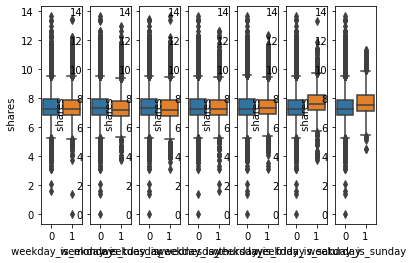

In [8]:
#Plot each day and log of shares to see if there is a difference between days.

fig, axes = plt.subplots(1, 7)
sns.boxplot(x=Mon, y=shares, orient='v', ax=axes[0])
sns.boxplot(x=Tue, y=shares, orient='v', ax=axes[1])
sns.boxplot(x=Wed, y=shares, orient='v', ax=axes[2])
sns.boxplot(x=Thu, y=shares, orient='v', ax=axes[3])
sns.boxplot(x=Fri, y=shares, orient='v', ax=axes[4])
sns.boxplot(x=Sat, y=shares, orient='v', ax=axes[5])
sns.boxplot(x=Sun, y=shares, orient='v', ax=axes[6])
plt.show()

The weekdays have about the same number of shares, but the weekends are different.  We will keep the indictor for "is_weekend" and remove the other "weekday_is" variables.

In [9]:
#Drop the "weekday_is..." columns since we are keeping the "is_weekend" column.
df = df.drop(df.columns[[29, 30, 31, 32, 33, 34, 35]], axis=1)

#View the data frame to ensure that the columns were removed
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [10]:
#Create new dataframes for the data_channel_is variables.

Life = df[" data_channel_is_lifestyle"]        
Ent = df[" data_channel_is_entertainment"]        
Bus = df[" data_channel_is_bus"]                  
Soc = df[" data_channel_is_socmed"]               
Tech = df[" data_channel_is_tech"]                 
Wor = df[" data_channel_is_world"]    

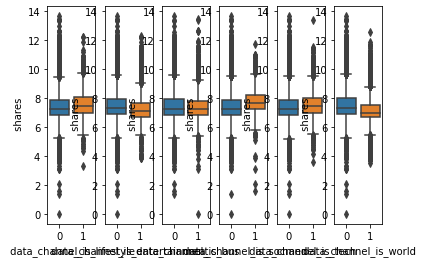

In [11]:
#Plot each channel and log of shares to see if there is a difference between channels.

fig, axes = plt.subplots(1, 6)
sns.boxplot(x=Life, y=shares, orient='v', ax=axes[0])
sns.boxplot(x=Ent, y=shares, orient='v', ax=axes[1])
sns.boxplot(x=Bus, y=shares, orient='v', ax=axes[2])
sns.boxplot(x=Soc, y=shares, orient='v', ax=axes[3])
sns.boxplot(x=Tech, y=shares, orient='v', ax=axes[4])
sns.boxplot(x=Wor, y=shares, orient='v', ax=axes[5])
plt.show()

Soc has the highest median log shares so we will keep it and drop the rest of the channels from our data set.

In [12]:
#Drop the "data_channel_is..." columns.
df = df.drop(df.columns[[11, 12, 13, 15, 16]], axis=1)

#View the data frame to ensure that the columns were removed
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [13]:
#Import pandas_profiling to perform EDA
import pandas_profiling 

#View the EDA report
pandas_profiling.ProfileReport(df)

Number of variables,47
Number of observations,39644
Total Missing (%),0.0%
Total size in memory,14.2 MiB
Average record size in memory,376.0 B
Numeric,42
Categorical,0
Boolean,2
Date,0
Text (Unique),0
Rejected,3


kw_avg_min is highly correlated with kw_max_min (ρ = 0.94053)<br>
n_non_stop_unique_tokens is highly correlated with n_non_stop_words (ρ = 0.99953)<br>
n_non_stop_words is highly correlated with n_unique_tokens (ρ = 0.99957).<br>  

We will drop kw_avg_min from the data set and keep kw_max_min.<br>
We will drop n_non_stop_unique_tokens and n_non_stop_words from the data set and keep n_unique_tokens.

In [13]:
#Drop the n_non_stop_words, n_non_stop_unique_tokens, and kw_avg_min columns since they are highly correlated to other 
#variables.
df = df.drop(df.columns[[3, 4, 14]], axis=1)

#View the data frame to ensure that the columns were removed
df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_socmed,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12,219,0.663594,4,2,1,0,4.680365,5,0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9,255,0.604743,3,1,1,0,4.913725,4,0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9,211,0.575130,3,1,1,0,4.393365,6,0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9,531,0.503788,9,0,1,0,4.404896,7,0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13,1072,0.415646,19,19,20,0,4.682836,7,0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


We now have 44 variables (including the response variable) in our data set.

<h4><b>Histograms and Boxplots</b></h4>

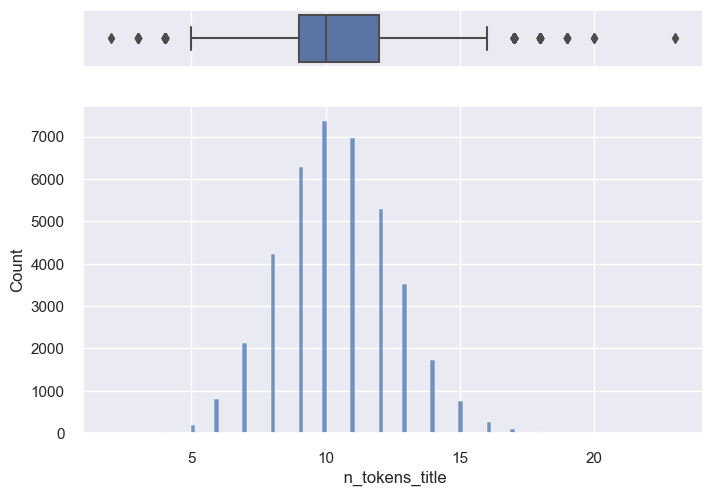

In [16]:
#To get the boxplot and histogram to print side by side, I used the site below for the code. 
#https://www.python-graph-gallery.com/24-histogram-with-a-boxplot-on-top-seaborn

#Set a grey background
sns.set(style="darkgrid")
 
#Create a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
 
#Assigning a graph to each ax
sns.boxplot(df[" n_tokens_title"], ax=ax_box)
sns.histplot(data=df, x=' n_tokens_title', ax=ax_hist)
 
#Remove x axis name for the boxplot
ax_box.set(xlabel='')
plt.show()

n_tokens_title is the number of words in the title which is discrete numeric data.  The boxplot shows the median value is 10.  Q1 to Q3 is 9-12 with outliers as low as 2 and as high as 23.  The histogram has large peaks at 9, 10, 11 and 12 with 10 being the mode. 

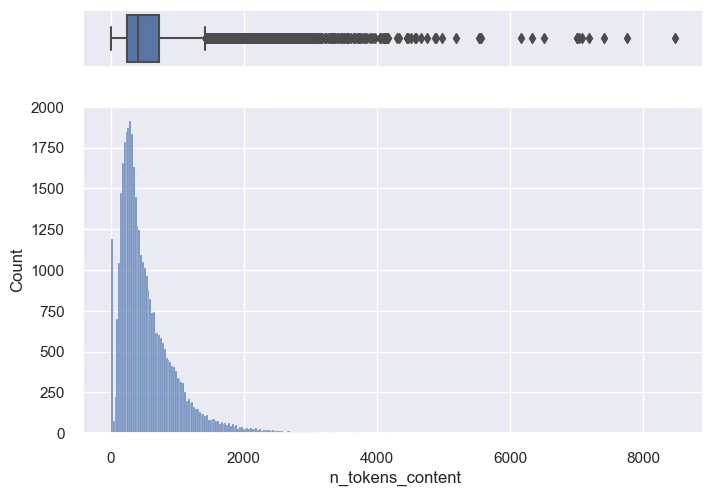

In [17]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df[" n_tokens_content"], ax=ax_box)
sns.histplot(data=df, x=' n_tokens_content', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

n_tokens_content is the number of words in the content which is discrete numeric data.  The boxplot shows the median value is 409.  Q1 to Q3 is 246-716 with outliers as low as 0 and as high as 8,474.  The histogram is right skewed with a mode of 0. 

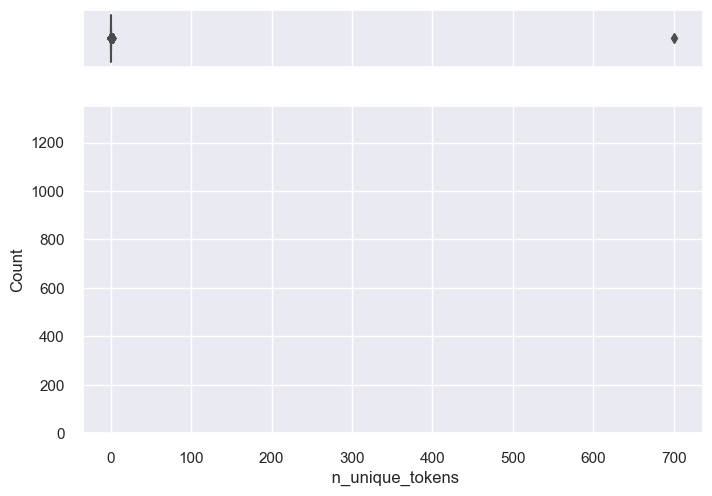

In [14]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" n_unique_tokens"], ax=ax_box)
sns.histplot(data=df, x=' n_unique_tokens', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

n_unique_tokens is the rate of unique words in the content which is continuous numeric data.  The boxplot shows the median value is 0.54.  Q1 to Q3 is 0.47 - 0.61 with outliers as low as 0 and as high as 701.  The histogram is right skewed with a mode of 0.  Since this is a rate, all values should be between 0 and 1.  We will drop the row with 701.  

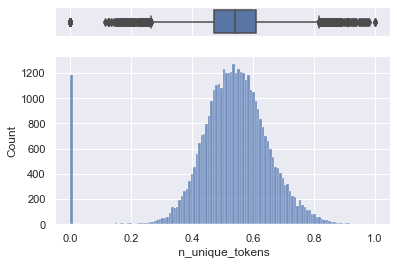

In [14]:
#Drop outlier with 701 as the n_unique_tokens
df = df[df[' n_unique_tokens'] != 701]

#Rerun the histogram and boxplot.
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" n_unique_tokens"], ax=ax_box)
sns.histplot(data=df, x=' n_unique_tokens', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

Now that the outlier is removed, the boxplot shows the median value is 0.54.  Q1 to Q3 is 0.47 - 0.61 with outliers as low as 0 and as high as 1.  The histogram is bell-shaped with the peak around 0.55.  There is a large peak outside of the curve at 0 which is also the mode.

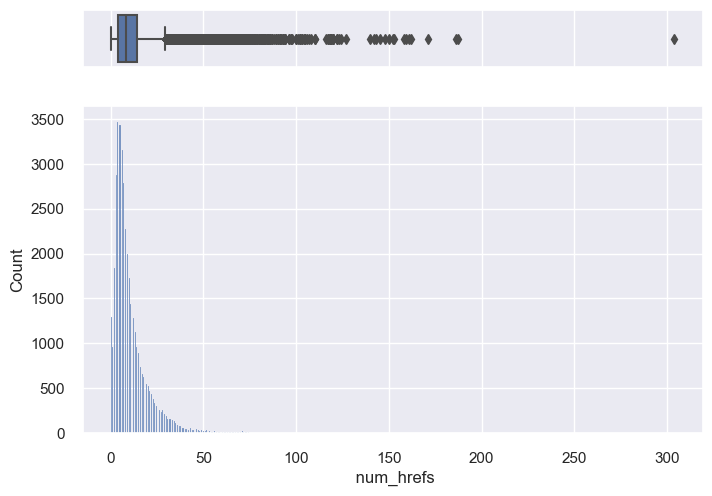

In [19]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df[" num_hrefs"], ax=ax_box)
sns.histplot(data=df, x=' num_hrefs', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

num_hrefs is the number of links which is discrete numeric data.  The boxplot shows the median value is 8.  Q1 to Q3 is 4-14 with outliers as low as 0 and as high as 304.  The histogram is right skewed with a mode of 4. 

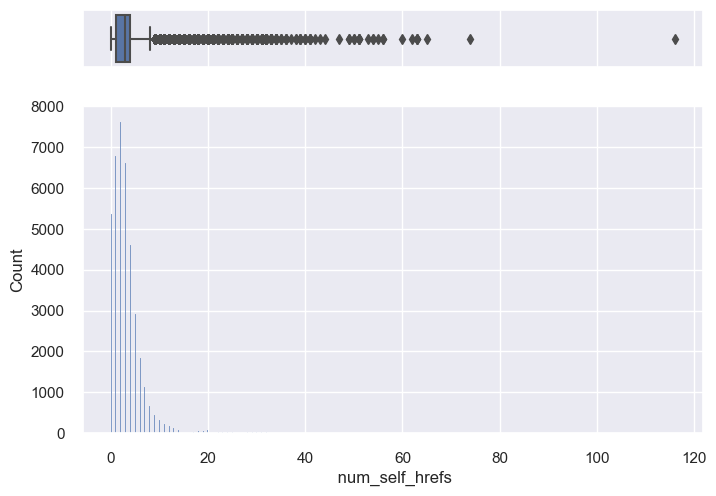

In [20]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df[" num_self_hrefs"], ax=ax_box)
sns.histplot(data=df, x=' num_self_hrefs', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

num_self_hrefs is the number of links to other articles published by Mashable which is discrete numeric data. The boxplot shows the median value is 3.  Q1 to Q3 is 1-4 with outliers as low as 0 and as high as 116.  The histogram is right skewed with a mode of 2. 

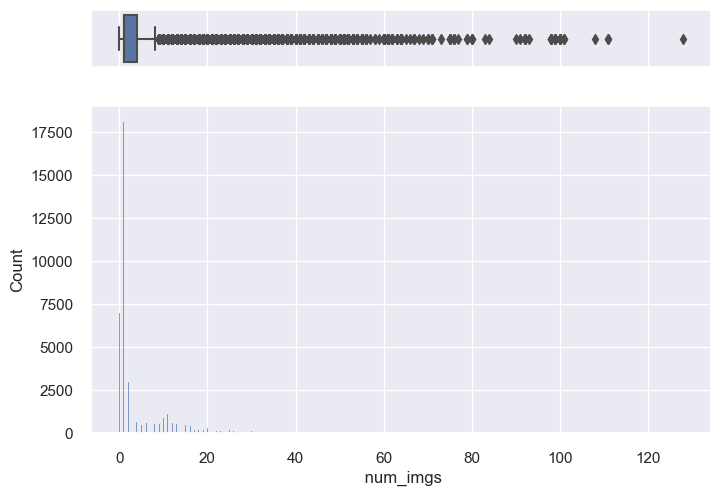

In [21]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df[" num_imgs"], ax=ax_box)
sns.histplot(data=df, x=' num_imgs', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

num_imgs is the number of images which is discrete numeric data. The boxplot shows the median value is 1.  Q1 to Q3 is 1-4 with outliers as low as 0 and as high as 128.  The histogram is right skewed with a mode of 1. 

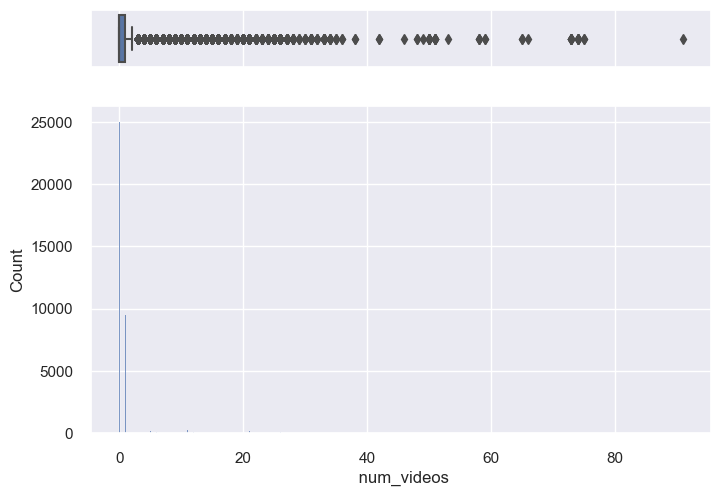

In [22]:
sns.set(style="darkgrid")
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df[" num_videos"], ax=ax_box)
sns.histplot(data=df, x=' num_videos', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

num_videos is the number of videos which is discrete numeric data. The boxplot shows the median value is 0.  Q1 to Q3 is 0-1 with outliers as high as 91.  The histogram is right skewed with a mode of 0. 

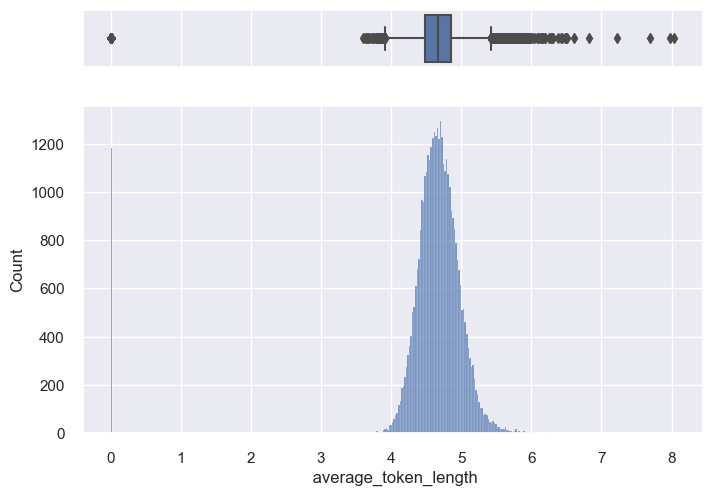

In [23]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" average_token_length"], ax=ax_box)
sns.histplot(data=df, x=' average_token_length', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

average_token_length is the average length of the words in the content which is continuous numeric data. The boxplot shows the median value is 4.66.  Q1 to Q3 is 4.48-4.85 with outliers as low as 0 and as high as 8.04.  The histogram is bell-shaped with a peak round 4.75.  The mode is 0. 

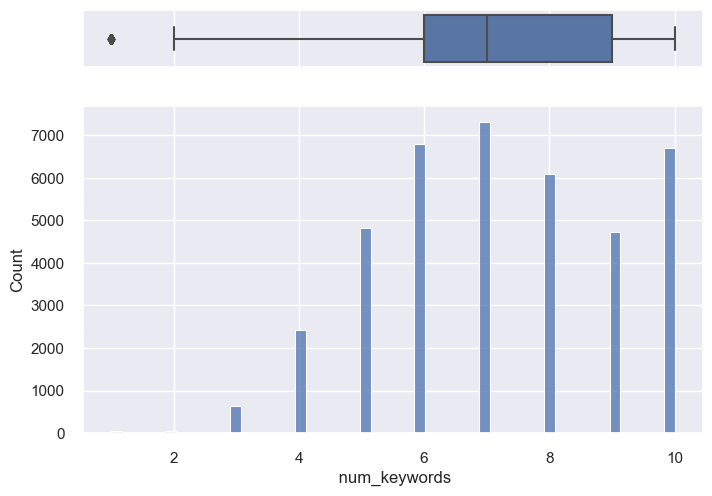

In [55]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" num_keywords"], ax=ax_box)
sns.histplot(data=df, x=' num_keywords', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

num_keywords is the number of keywords in the metadata which is discrete numeric data. The boxplot shows the median value is 7.  Q1 to Q3 is 6-9 with outliers as low as 1 and as high as 10.  The histogram is left skewed with a mode of 7 and high peaks at 6 and 10. 

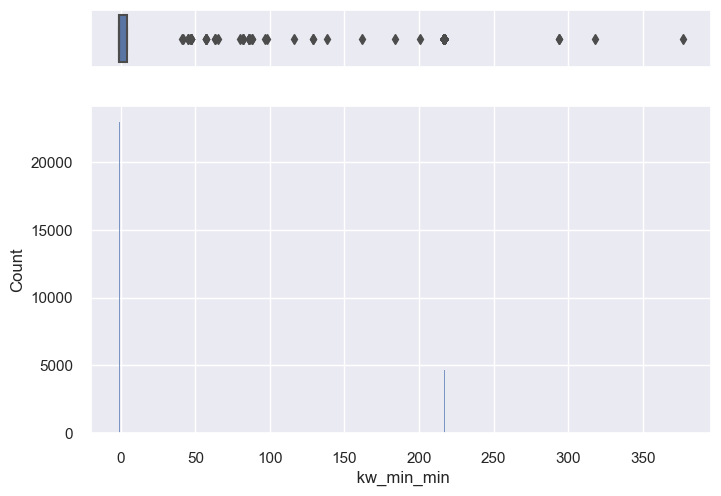

In [56]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" kw_min_min"], ax=ax_box)
sns.histplot(data=df, x=' kw_min_min', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

kw_min_min is the worst keyword (min. shares) which is discrete numeric data. The boxplot shows the median value is -1. Q1 to Q3 is -1 to 4 with outliers as high as 217. The histogram only shows two peaks at -1 and 217.  The mode is -1. 

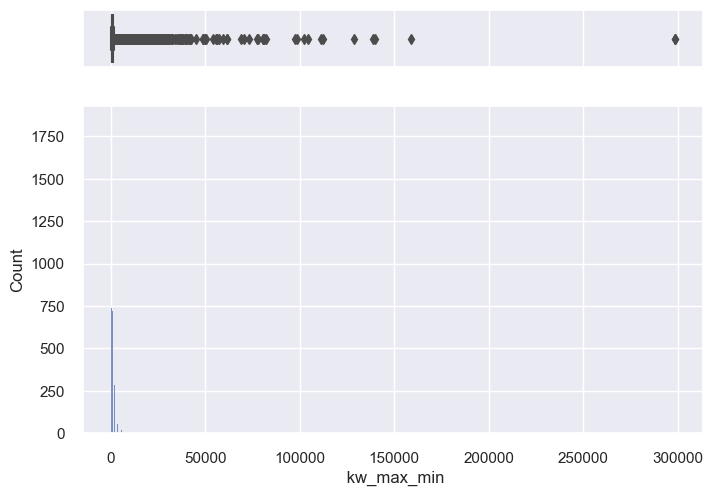

In [57]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" kw_max_min"], ax=ax_box)
sns.histplot(data=df, x=' kw_max_min', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

kw_max_min is the worst keyword (max. shares) which is discrete numeric data. The boxplot shows the median value is 660. Q1 to Q3 is 445 - 1,000 with outliers as low as 0 and as high as 298,400. The histogram is right skewed with a mode of 1,100.

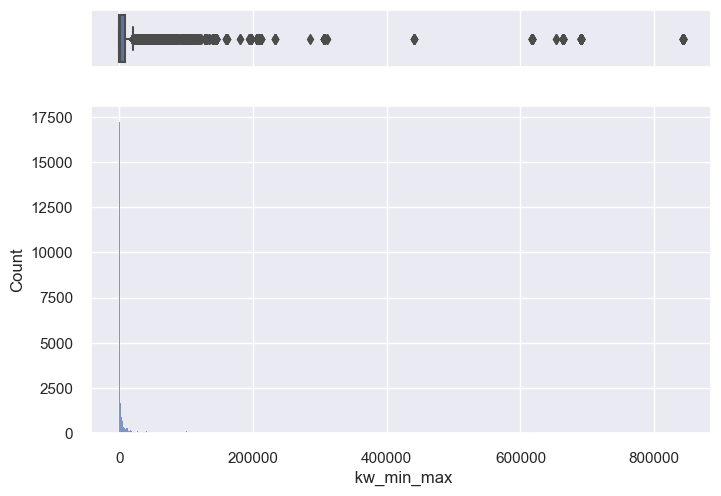

In [58]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" kw_min_max"], ax=ax_box)
sns.histplot(data=df, x=' kw_min_max', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

kw_max_min is the best keyword (min. shares) which is discrete numeric data. The boxplot shows the median value is 1,400. Q1 to Q3 is 0-7,900 with outliers as high as 843,300. The histogram is right skewed with a mode of 0.

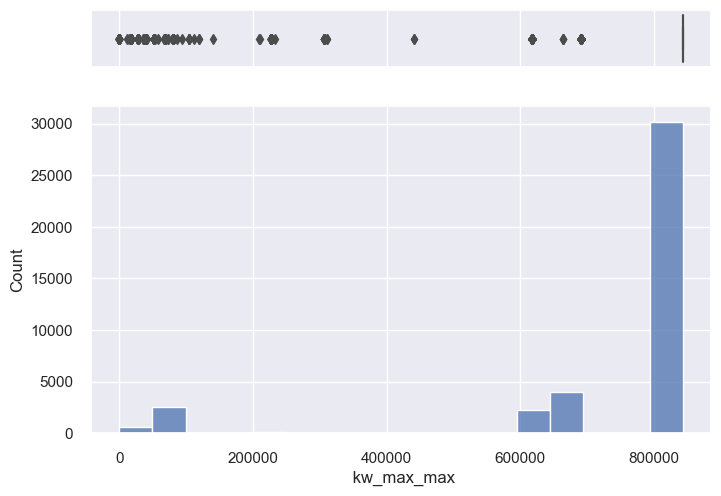

In [59]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" kw_max_max"], ax=ax_box)
sns.histplot(data=df, x=' kw_max_max', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

kw_max_max is the best keyword (max. shares)  which is discrete numeric data. The boxplot shows the median value is 843,300. Q1 to Q3 is 843,300 - 843,300 with outliers as low as 0. The histogram is left skewed with a mode of 843,300.

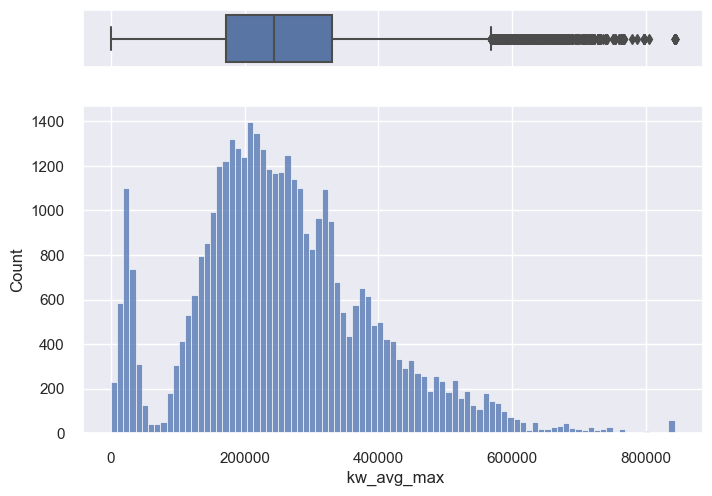

In [60]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" kw_avg_max"], ax=ax_box)
sns.histplot(data=df, x=' kw_avg_max', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

kw_avg_max is the best keyword (average shares) which is numeric data. The boxplot shows the median value is 244,570. Q1 to Q3 is 172,850 - 330,980 with outliers as low as 0 and as high as 843,300. The histogram is right skewed with a mode of 0.

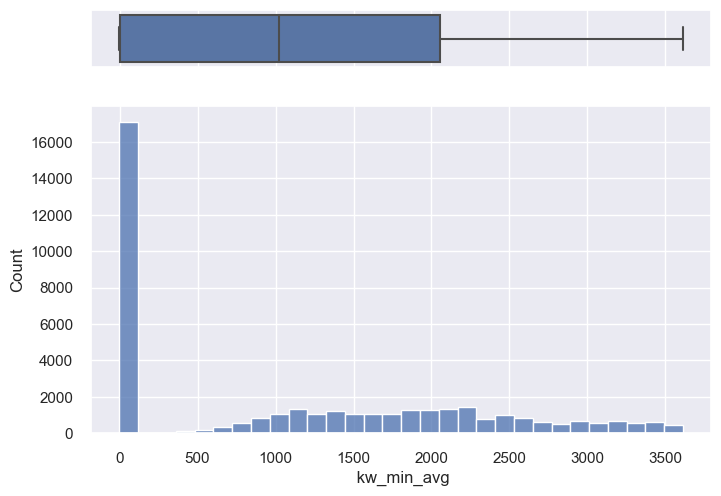

In [61]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" kw_min_avg"], ax=ax_box)
sns.histplot(data=df, x=' kw_min_avg', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

kw_min_avg is the avg. keyword (min. shares) which is continuous numeric data. The boxplot shows the median value is 1,023.6. Q1 to Q3 is 0 - 2,056.8 with outliers as low as -1 and as high as 3,613. The histogram is right skewed with a mode of 0.

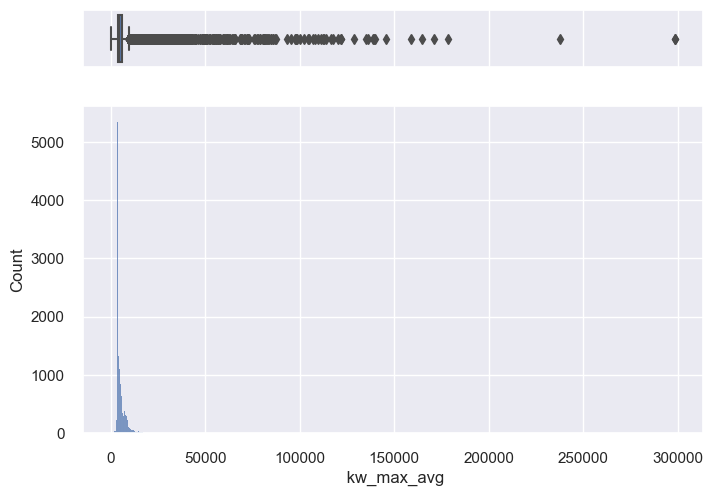

In [62]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" kw_max_avg"], ax=ax_box)
sns.histplot(data=df, x=' kw_max_avg', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

kw_max_avg is the average keyword (maximum shares) which is continuous numeric data. The boxplot shows the median value is 4,355.7. Q1 to Q3 is 3,562.1 - 6020 with outliers as low as 0 and as high as 298,400. The histogram is right skewed with a mode of 0.

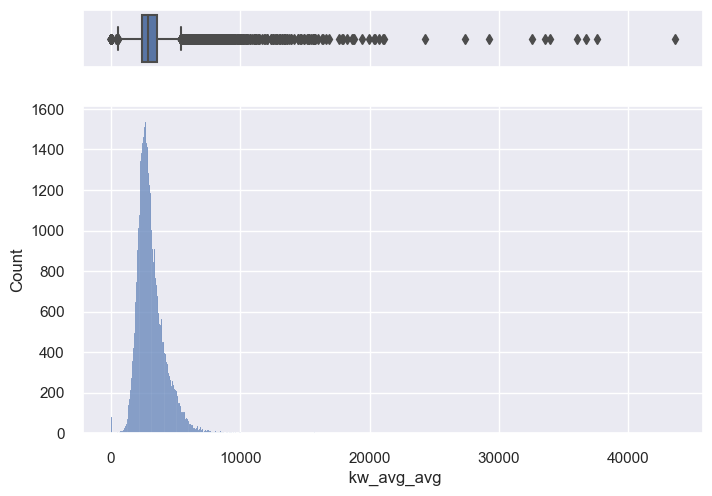

In [63]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" kw_avg_avg"], ax=ax_box)
sns.histplot(data=df, x=' kw_avg_avg', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

kw_avg_avg is the avg. keyword (avg. shares) which is continuous numeric data. The boxplot shows the median value is 2,870.1. Q1 to Q3 is 2,382.4 - 3,600.2 with outliers as low as 0 and as high as 435,568. The histogram is right skewed with a mode of 0.

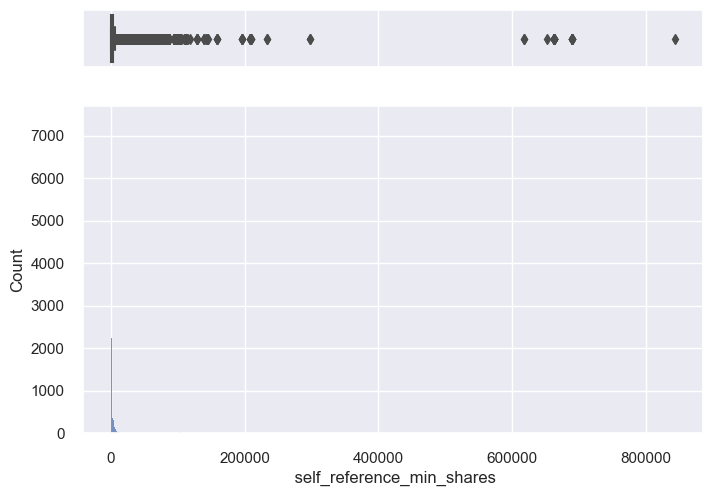

In [64]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" self_reference_min_shares"], ax=ax_box)
sns.histplot(data=df, x=' self_reference_min_shares', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

self_reference_min_shares is the Min. shares of referenced articles in Mashable which is discrete numeric data. The boxplot shows the median value is 1,200. Q1 to Q3 is 639 - 2,600 with outliers as low as 0 and as high as 843,330. The histogram is right skewed with a mode of 0.

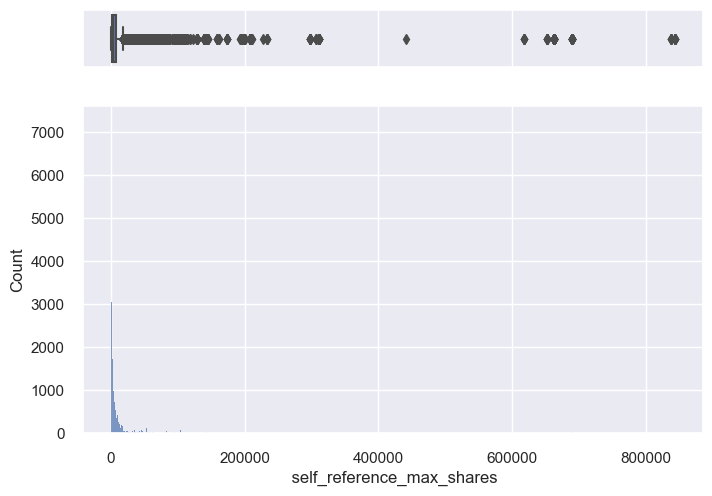

In [65]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" self_reference_max_shares"], ax=ax_box)
sns.histplot(data=df, x=' self_reference_max_shares', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

self_reference_max_shares is the max. shares of referenced articles in Mashable which is discrete numeric data. The boxplot shows the median value is 2,800. Q1 to Q3 is 1,100 - 8,000 with outliers as low as 0 and as high as 843,330. The histogram is right skewed with a mode of 0.

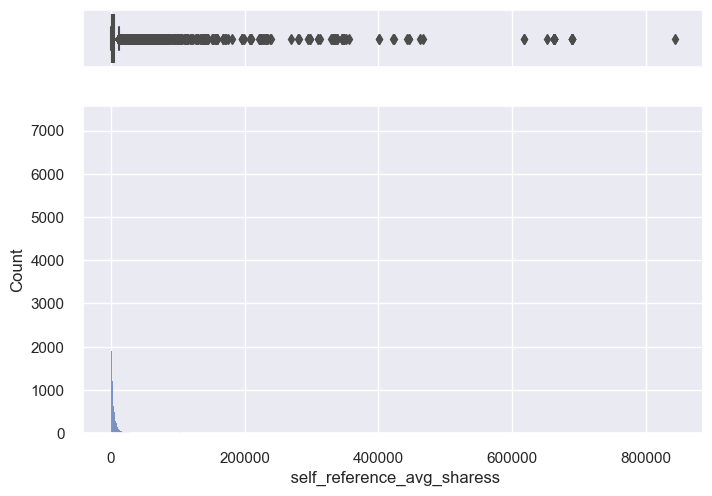

In [66]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" self_reference_avg_sharess"], ax=ax_box)
sns.histplot(data=df, x=' self_reference_avg_sharess', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

self_reference_avg_sharess is the average shares of referenced articles in Mashable which is numeric data. The boxplot shows the median value is 2,200. Q1 to Q3 is 981.2 - 5,200 with outliers as low as 0 and as high as 843,330. The histogram is right skewed with a mode of 0.

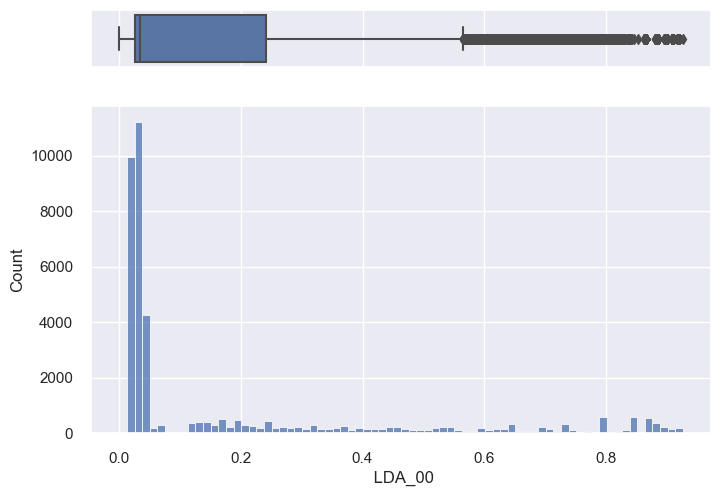

In [67]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" LDA_00"], ax=ax_box)
sns.histplot(data=df, x=' LDA_00', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

LDA_00 is the closeness to LDA topic 0 which is numeric data. The boxplot shows the median value is 0.033. Q1 to Q3 is 0.025 - 0.24 with outliers as low as 0 and as high as 0.93. The histogram is right skewed with a mode of 0.067.

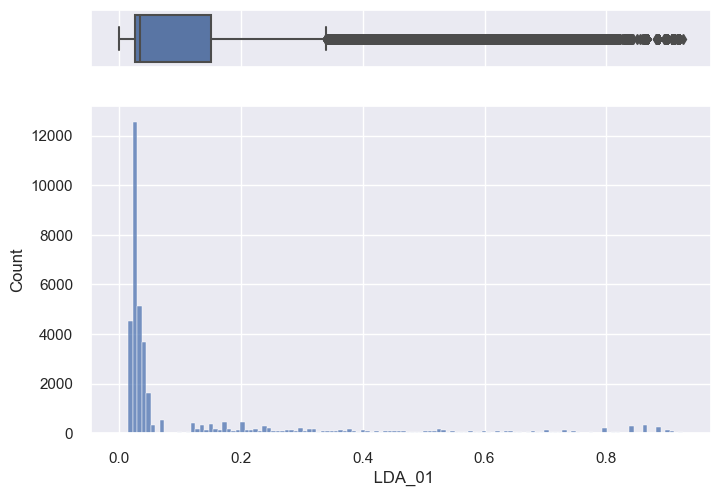

In [68]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" LDA_01"], ax=ax_box)
sns.histplot(data=df, x=' LDA_01', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

LDA_01 is the closeness to LDA topic 1 which is numeric data. The boxplot shows the median value is 0.033. Q1 to Q3 is 0.025 - 0.15 with outliers as low as 0 and as high as 0.93. The histogram is right skewed with a mode of 0.067.

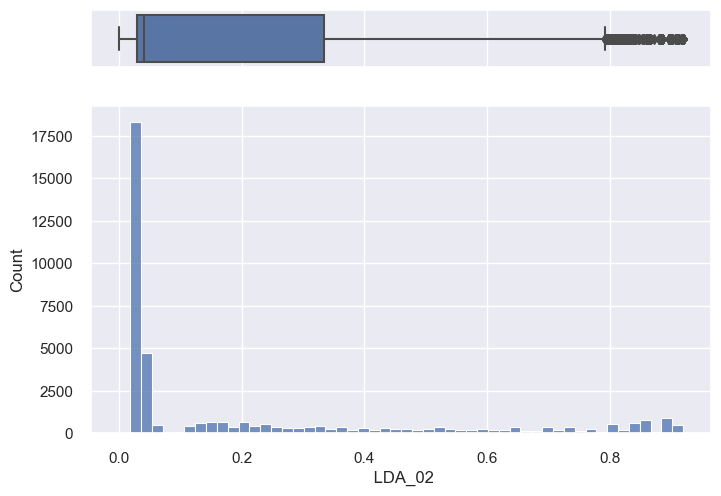

In [69]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" LDA_02"], ax=ax_box)
sns.histplot(data=df, x=' LDA_02', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

LDA_02 is the closeness to LDA topic 2 which is numeric data. The boxplot shows the median value is 0.04. Q1 to Q3 is 0.029 - 0.33 with outliers as low as 0 and as high as 0.92. The histogram is right skewed with a mode of 0.733.

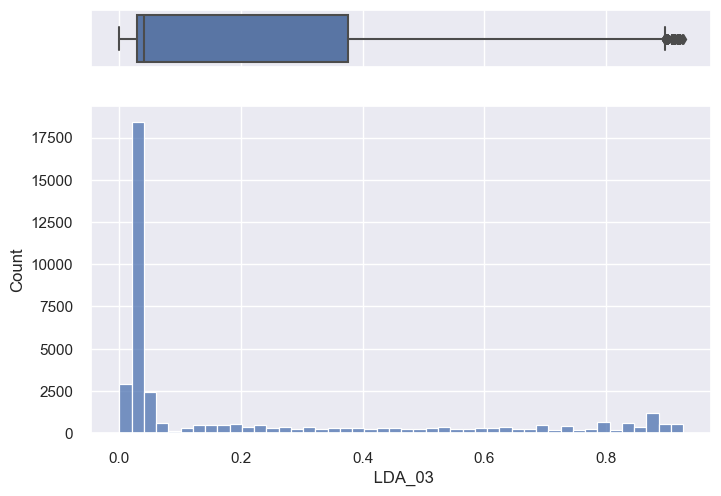

In [70]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" LDA_03"], ax=ax_box)
sns.histplot(data=df, x=' LDA_03', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

LDA_03 is the closeness to LDA topic 3 which is numeric data. The boxplot shows the median value is 0.04. Q1 to Q3 is 0.029 - 0.38 with outliers as low as 0 and as high as 0.92. The histogram is right skewed with a mode of 0.067.

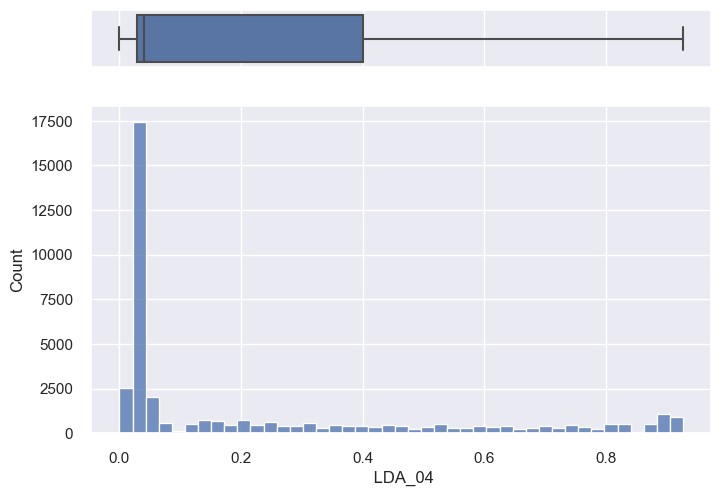

In [71]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" LDA_04"], ax=ax_box)
sns.histplot(data=df, x=' LDA_04', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

LDA_04 is the closeness to LDA topic 4 which is numeric data. The boxplot shows the median value is 0.04. Q1 to Q3 is 0.029 - 0.4 with outliers as low as 0 and as high as 0.93. The histogram is right skewed with a mode of 0.05.

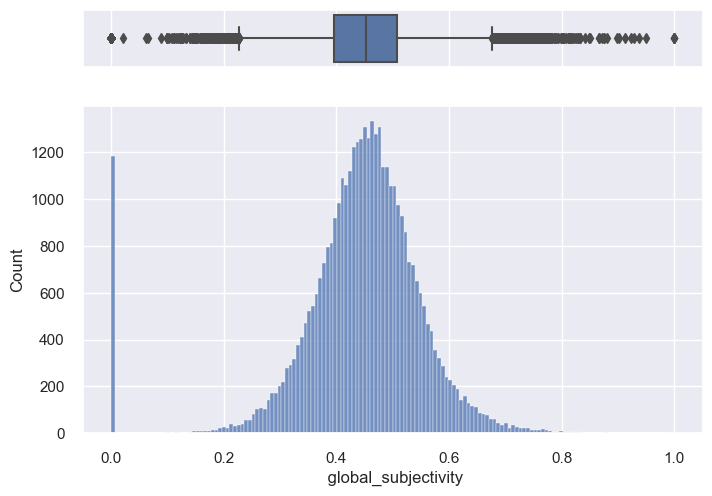

In [72]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" global_subjectivity"], ax=ax_box)
sns.histplot(data=df, x=' global_subjectivity', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

global_subjectivity is the text subjectivity which is continuous numeric data. The boxplot shows the median value is 0.04. Q1 to Q3 is 0.029 - 0.4 with outliers as low as 0 and as high as 0.93. The histogram is right skewed with a mode of 0.05.

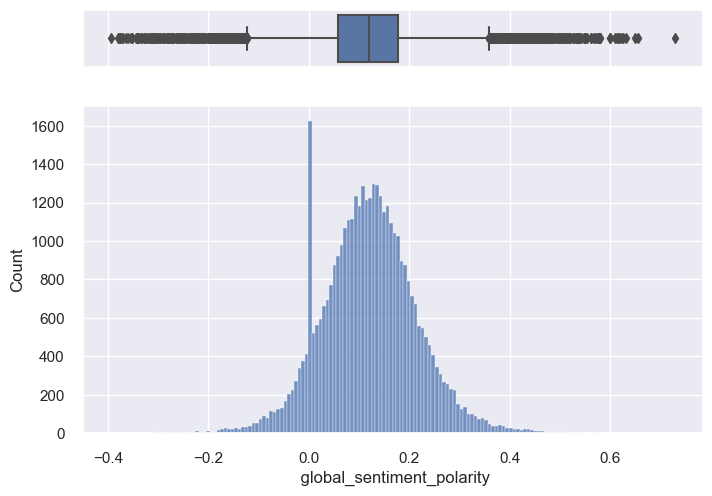

In [73]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" global_sentiment_polarity"], ax=ax_box)
sns.histplot(data=df, x=' global_sentiment_polarity', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

global_sentiment_polarity is the text sentiment polarity which is continuous numeric data. The boxplot shows the median value is 0.12. Q1 to Q3 is 0.06 - 0.18 with outliers as low as -0.39 and as high as 0.73. The histogram is bell-shaped, peaking at 0.15, but with an even higher peak at 0 which is also the mode.

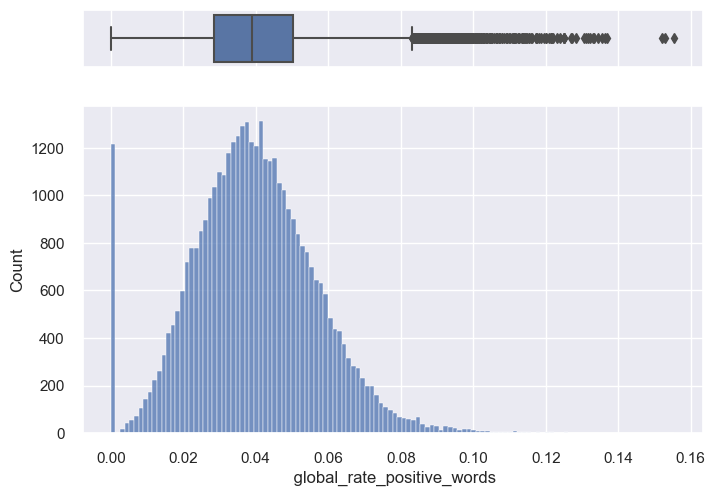

In [74]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" global_rate_positive_words"], ax=ax_box)
sns.histplot(data=df, x=' global_rate_positive_words', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

global_rate_positive_words is the rate of positive words in the content which is continuous numeric data. The boxplot shows the median value is 0.04. Q1 to Q3 is 0.03 - 0.05 with outliers as low as 0 and as high as 0.16. The histogram is bell-shaped with a mode of 0.042 but also had a high peak at 0 which is outside the bell curve.

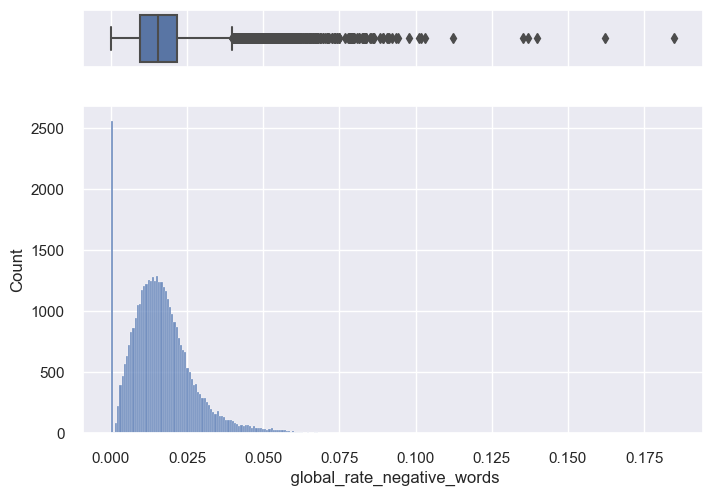

In [75]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" global_rate_negative_words"], ax=ax_box)
sns.histplot(data=df, x=' global_rate_negative_words', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

global_rate_negative_words is the rate of negative words in the content which is continuous numeric data. The boxplot shows the median value is 0.02. Q1 to Q3 is 0.01 - 0.02 with outliers as low as 0 and as high as 0.18. The histogram is bell-shaped but right skewed.  The mode is 0 which is a large peak outside of the bell curve.

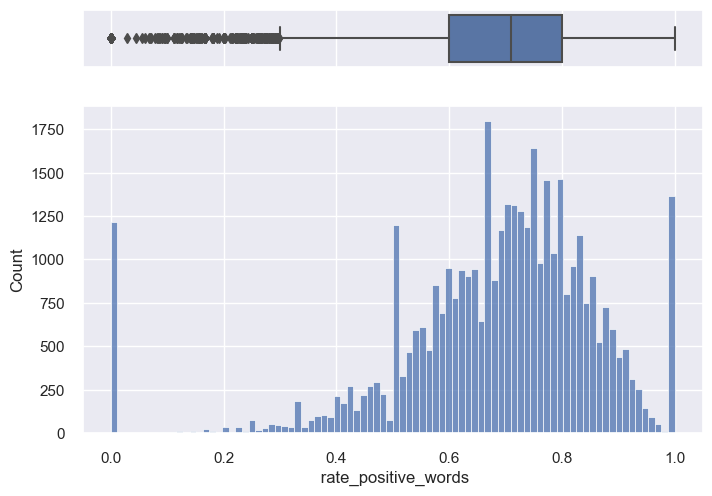

In [76]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" rate_positive_words"], ax=ax_box)
sns.histplot(data=df, x=' rate_positive_words', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

rate_positive_words is the rate of positive words among non-neutral tokens which is continuous numeric data. The boxplot shows the median value is 0.71. Q1 to Q3 is 0.6 - 0.8 with outliers as low as 0 and as high as 1. The histogram is mostly bell-shaped but left skewed with several large peaks.  The mode is 0.67 with the next highest peak at 1.

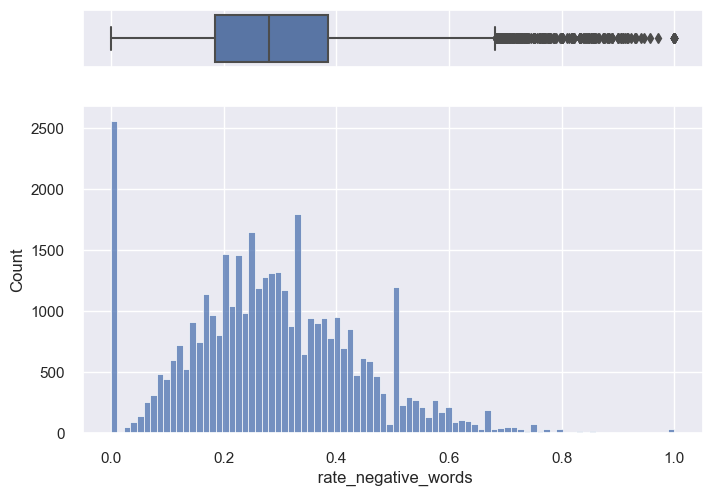

In [77]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" rate_negative_words"], ax=ax_box)
sns.histplot(data=df, x=' rate_negative_words', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

rate_negative_words is the rate of negative words among non-neutral tokens which is continuous numeric data. The boxplot shows the median value is 0.28. Q1 to Q3 is 0.19 - 0.38 with outliers as low as 0 and as high as 1. The histogram is mostly bell-shaped but right skewed with several large peaks.  The mode is 0, which is outside the bell-shaped curve, with the next highest peak at 0.33.

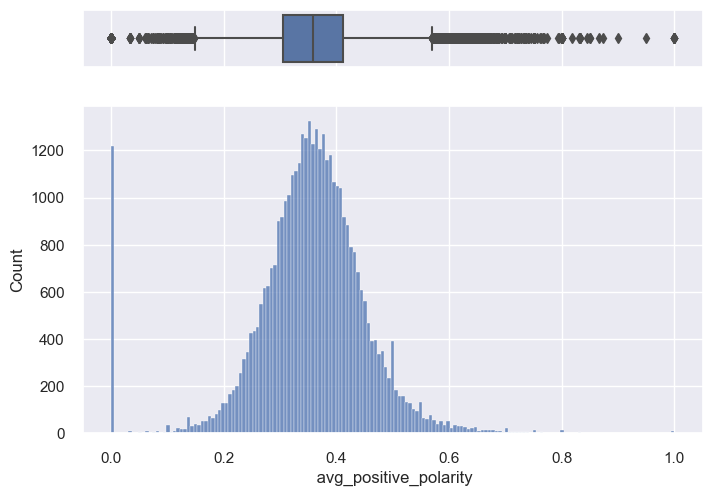

In [78]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" avg_positive_polarity"], ax=ax_box)
sns.histplot(data=df, x=' avg_positive_polarity', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

avg_positive_polarity is the average polarity of positive words. The boxplot shows the median value is 0.36. Q1 to Q3 is 0.31 - 0.41 with outliers as low as 0 and as high as 1. The histogram is bell-shaped but with a mode of 0 which is outside the bell curve.

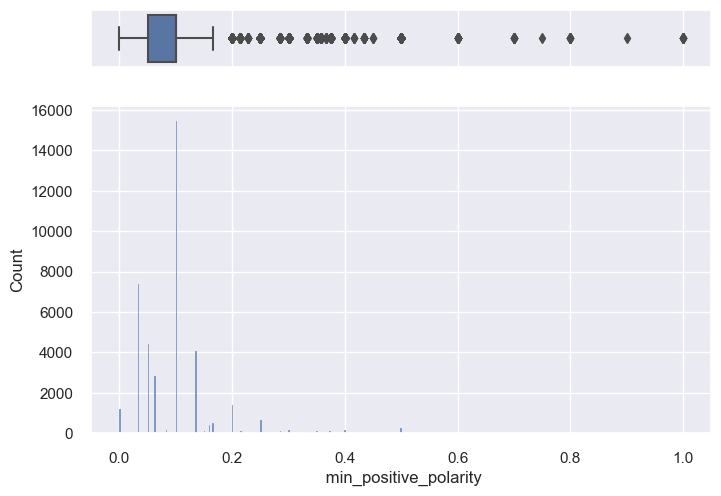

In [79]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" min_positive_polarity"], ax=ax_box)
sns.histplot(data=df, x=' min_positive_polarity', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

min_positive_polarity is the minimum polarity of positive words. The boxplot shows the median value is 0.1. Q1 to Q3 is 0.05 - 0.01 with outliers as low as 0 and as high as 1. The histogram has the highest peak at 0.1 and the next highest peak at 0.03.

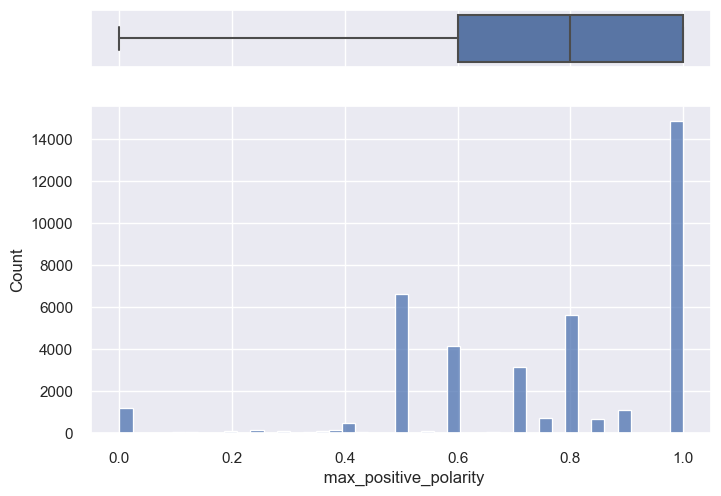

In [80]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" max_positive_polarity"], ax=ax_box)
sns.histplot(data=df, x=' max_positive_polarity', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

max_positive_polarity is the maximum polarity of positive words. The boxplot shows the median value is 0.8. Q1 to Q3 is 0.6 - 1 with outliers as low as 0. The histogram shows a mode of 1 and the next highest peak at 0.5.

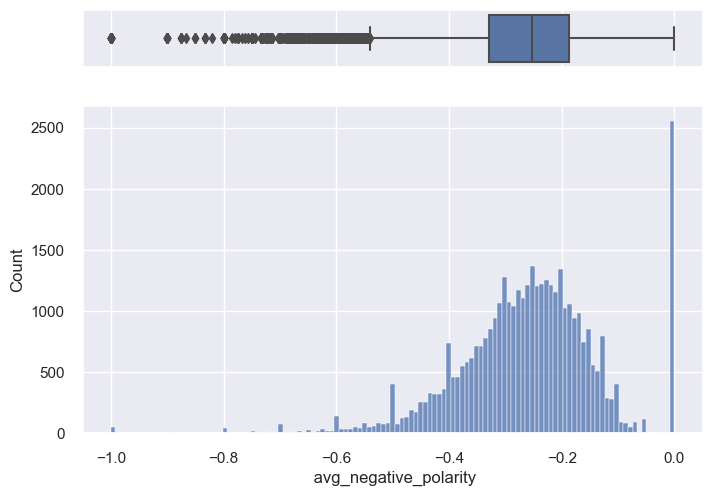

In [81]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" avg_negative_polarity"], ax=ax_box)
sns.histplot(data=df, x=' avg_negative_polarity', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

avg_negative_polarity is the average polarity of negative words. The boxplot shows the median value is -0.25. Q1 to Q3 is -0.33 to -0.19 with outliers as low as -1 and as high as 0. The histogram is bell-shaped with a left skew.  The mode is 0 which is outside the bell-shaped curve.

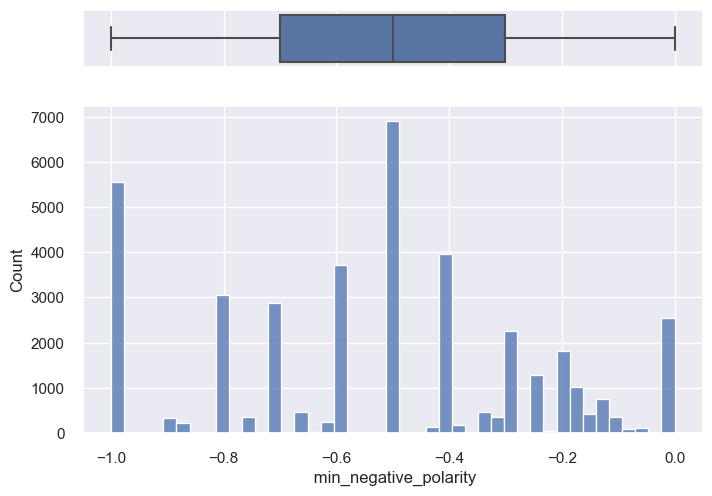

In [82]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" min_negative_polarity"], ax=ax_box)
sns.histplot(data=df, x=' min_negative_polarity', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

min_negative_polarity is the minimum polarity of negative words. The boxplot shows the median value is -0.5. Q1 to Q3 is -0.7 to -0.3 with outliers as low as -1 and as high as 0. The histogram shows a mode of -0.5 with the next highest peak at -1. 

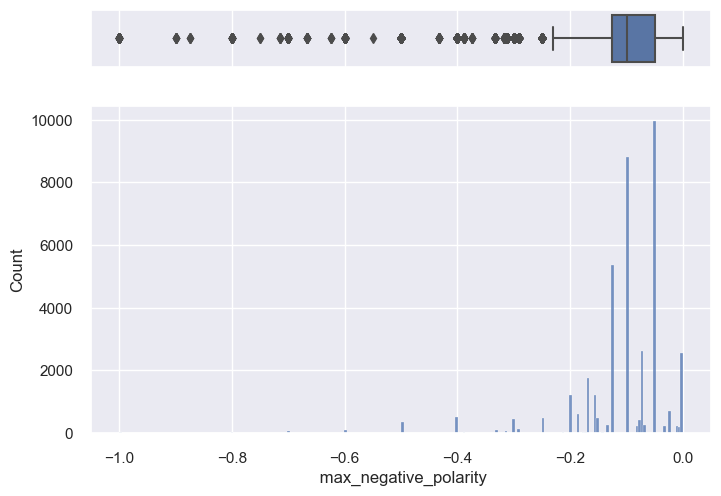

In [83]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" max_negative_polarity"], ax=ax_box)
sns.histplot(data=df, x=' max_negative_polarity', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

max_negative_polarity is the maximum polarity of negative words . The boxplot shows the median value is -0.1. Q1 to Q3 is -0.125 to -0.05 with outliers as low as -1 and as high as 0. The histogram shows a mode of -0.05 with the next highest peak at -0.1. 

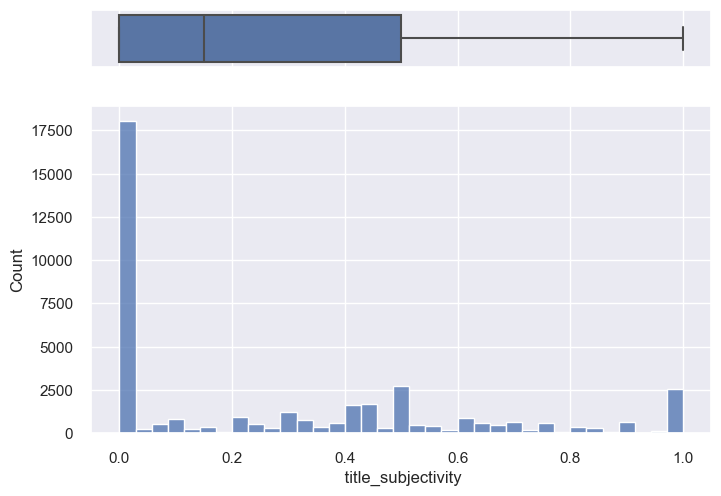

In [84]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" title_subjectivity"], ax=ax_box)
sns.histplot(data=df, x=' title_subjectivity', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

The title_subjectivity boxplot shows the median value is 0.15. Q1 to Q3 is 0 to 0.5 with outliers as high as 1. The histogram shows a mode of 0 with the next highest peak at 0.5. 

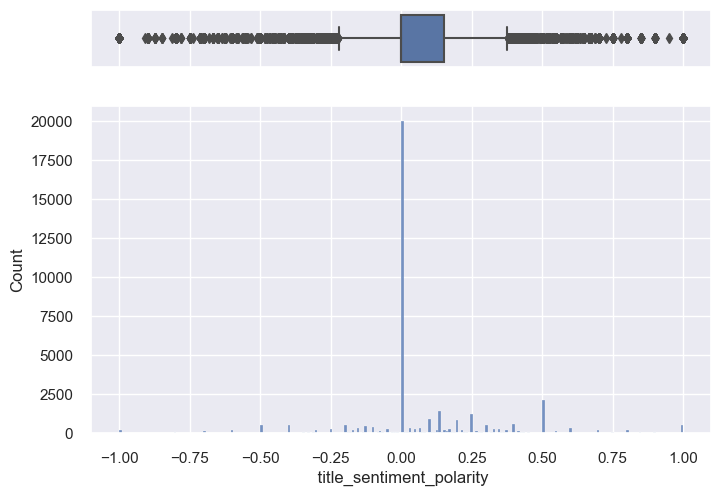

In [85]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" title_sentiment_polarity"], ax=ax_box)
sns.histplot(data=df, x=' title_sentiment_polarity', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

The title_sentiment_polarity boxplot shows the median value is 0. Q1 to Q3 is 0 to 0.15 with outliers as low as -1 and as high as 1. The histogram shows a mode of 0 with the next highest peak at 0.5. 

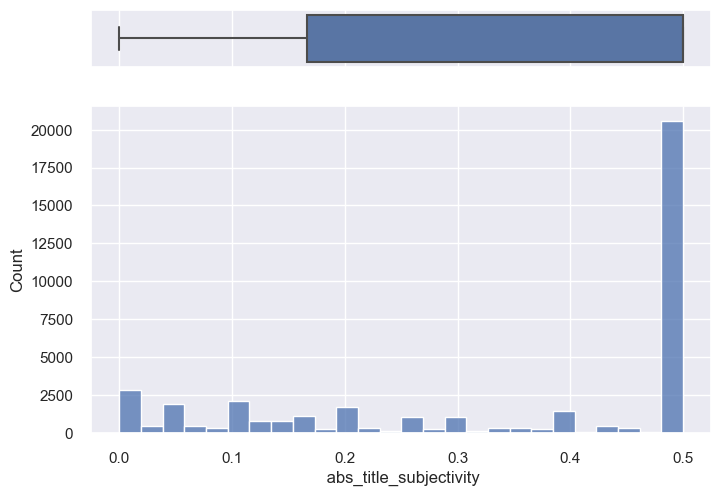

In [86]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" abs_title_subjectivity"], ax=ax_box)
sns.histplot(data=df, x=' abs_title_subjectivity', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

The abs_title_subjectivity is the absolute subjectivity level.  The boxplot shows the median value is 0.5. Q1 to Q3 is 0.17 to 0.5 with outliers as low as 0 and as high as 0.5. The histogram shows a mode of 0.5 with the next highest peak at 0. 

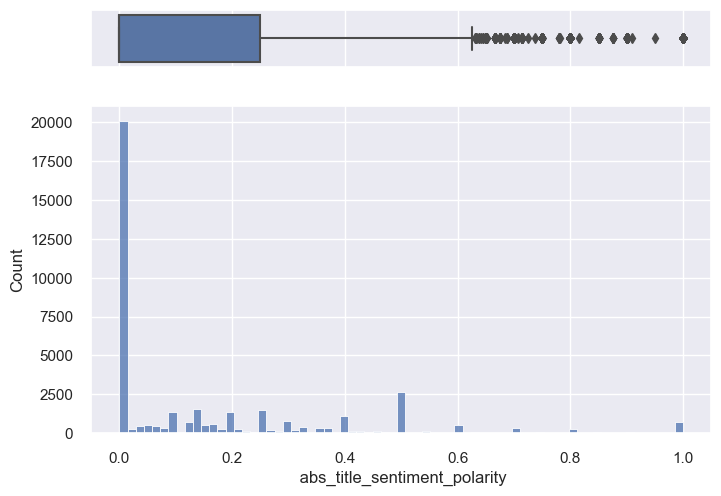

In [87]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" abs_title_sentiment_polarity"], ax=ax_box)
sns.histplot(data=df, x=' abs_title_sentiment_polarity', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

The abs_title_sentiment_polarity is the absolute polarity level.  The boxplot shows the median value is 0. Q1 to Q3 is 0 to 0.25 with outliers as high as 1. The histogram shows a mode of 0 with the next highest peak at 0.5. 

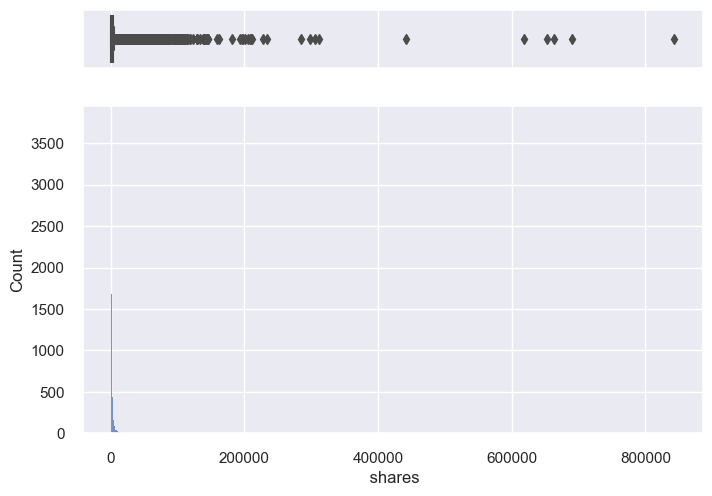

In [88]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" shares"], ax=ax_box)
sns.histplot(data=df, x=' shares', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

The number of shares boxplot shows the median value is 1,400. Q1 to Q3 is 946 to 2,800 with outliers as low as 1 and as high as 843,300. The histogram is right skewed and shows a mode of 1,100 with the next highest peak at 1,200. 

<h4><b>Outliers and Normalization</b></h4></b></h4>

In [15]:
#We saw a lot of outliers in many of the variables. Remove outliers based on the response variable, shares.

Q1 = df[' shares'].quantile(0.25)
Q3 = df[' shares'].quantile(0.75)
IQR = Q3 - Q1
LTV= Q1 - (1.5 * IQR)
UTV= Q3 + (1.5 * IQR)
df = df.drop(df[df[' shares'] > UTV].index)
df.shape

(35103, 44)

We reduced our data set from 39,644 observations to 35,103 observations.  This is an 11.5% decrease.

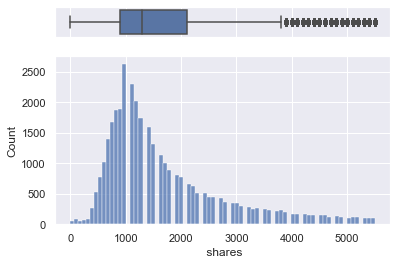

In [16]:
sns.set(style="darkgrid") 
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}) 
sns.boxplot(df[" shares"], ax=ax_box)
sns.histplot(data=df, x=' shares', ax=ax_hist)
ax_box.set(xlabel='')
plt.show()

Shares looks more bell-shaped now but it is still right skewed.

In [17]:
#Remove catagorical variables before normalizing the data.
df2 = df.drop(df.columns[[9, 21]], axis=1)

#View the data frame to ensure that the columns were removed
df2.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12,219,0.663594,4,2,1,0,4.680365,5,0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9,255,0.604743,3,1,1,0,4.913725,4,0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9,211,0.575130,3,1,1,0,4.393365,6,0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9,531,0.503788,9,0,1,0,4.404896,7,0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13,1072,0.415646,19,19,20,0,4.682836,7,0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [18]:
#Normalize the data

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(df2)

In [19]:
#Convert normalized data to a new dataframe

df3 = pd.DataFrame(data_scaled, columns = ['n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'num_hrefs', 
                                           'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords',
                                           'kw_min_min', 'kw_max_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max',
                                           'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 
                                           'self_reference_max_shares', 'self_reference_avg_sharess', 'LDA_00',
                                           'LDA_01', 'LDA_02',  'LDA_03', 'LDA_04', 'global_subjectivity', 
                                           'global_sentiment_polarity', 'global_rate_positive_words', 
                                           'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words',
                                           'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity',
                                           'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 
                                           'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 
                                           'abs_title_sentiment_polarity', 'shares'])
df3.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_min,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0.555556,0.028207,0.663594,0.021390,0.017241,0.007812,0.0,0.582024,0.444444,0.002646,...,0.100000,0.7,0.650000,0.400,0.800000,0.500000,0.406250,0.000000,0.187500,0.107656
1,0.388889,0.032844,0.604743,0.016043,0.008621,0.007812,0.0,0.611043,0.333333,0.002646,...,0.033333,0.7,0.881250,0.875,0.900000,0.000000,0.500000,1.000000,0.000000,0.129114
2,0.388889,0.027177,0.575130,0.016043,0.008621,0.007812,0.0,0.546334,0.555556,0.002646,...,0.100000,1.0,0.533333,0.200,0.866667,0.000000,0.500000,1.000000,0.000000,0.272595
3,0.388889,0.068393,0.503788,0.048128,0.000000,0.007812,0.0,0.547768,0.666667,0.002646,...,0.136364,0.8,0.630303,0.400,0.833333,0.000000,0.500000,1.000000,0.000000,0.218040
4,0.611111,0.138073,0.415646,0.101604,0.163793,0.156250,0.0,0.582331,0.666667,0.002646,...,0.033333,1.0,0.779808,0.500,0.950000,0.454545,0.568182,0.090909,0.136364,0.091653


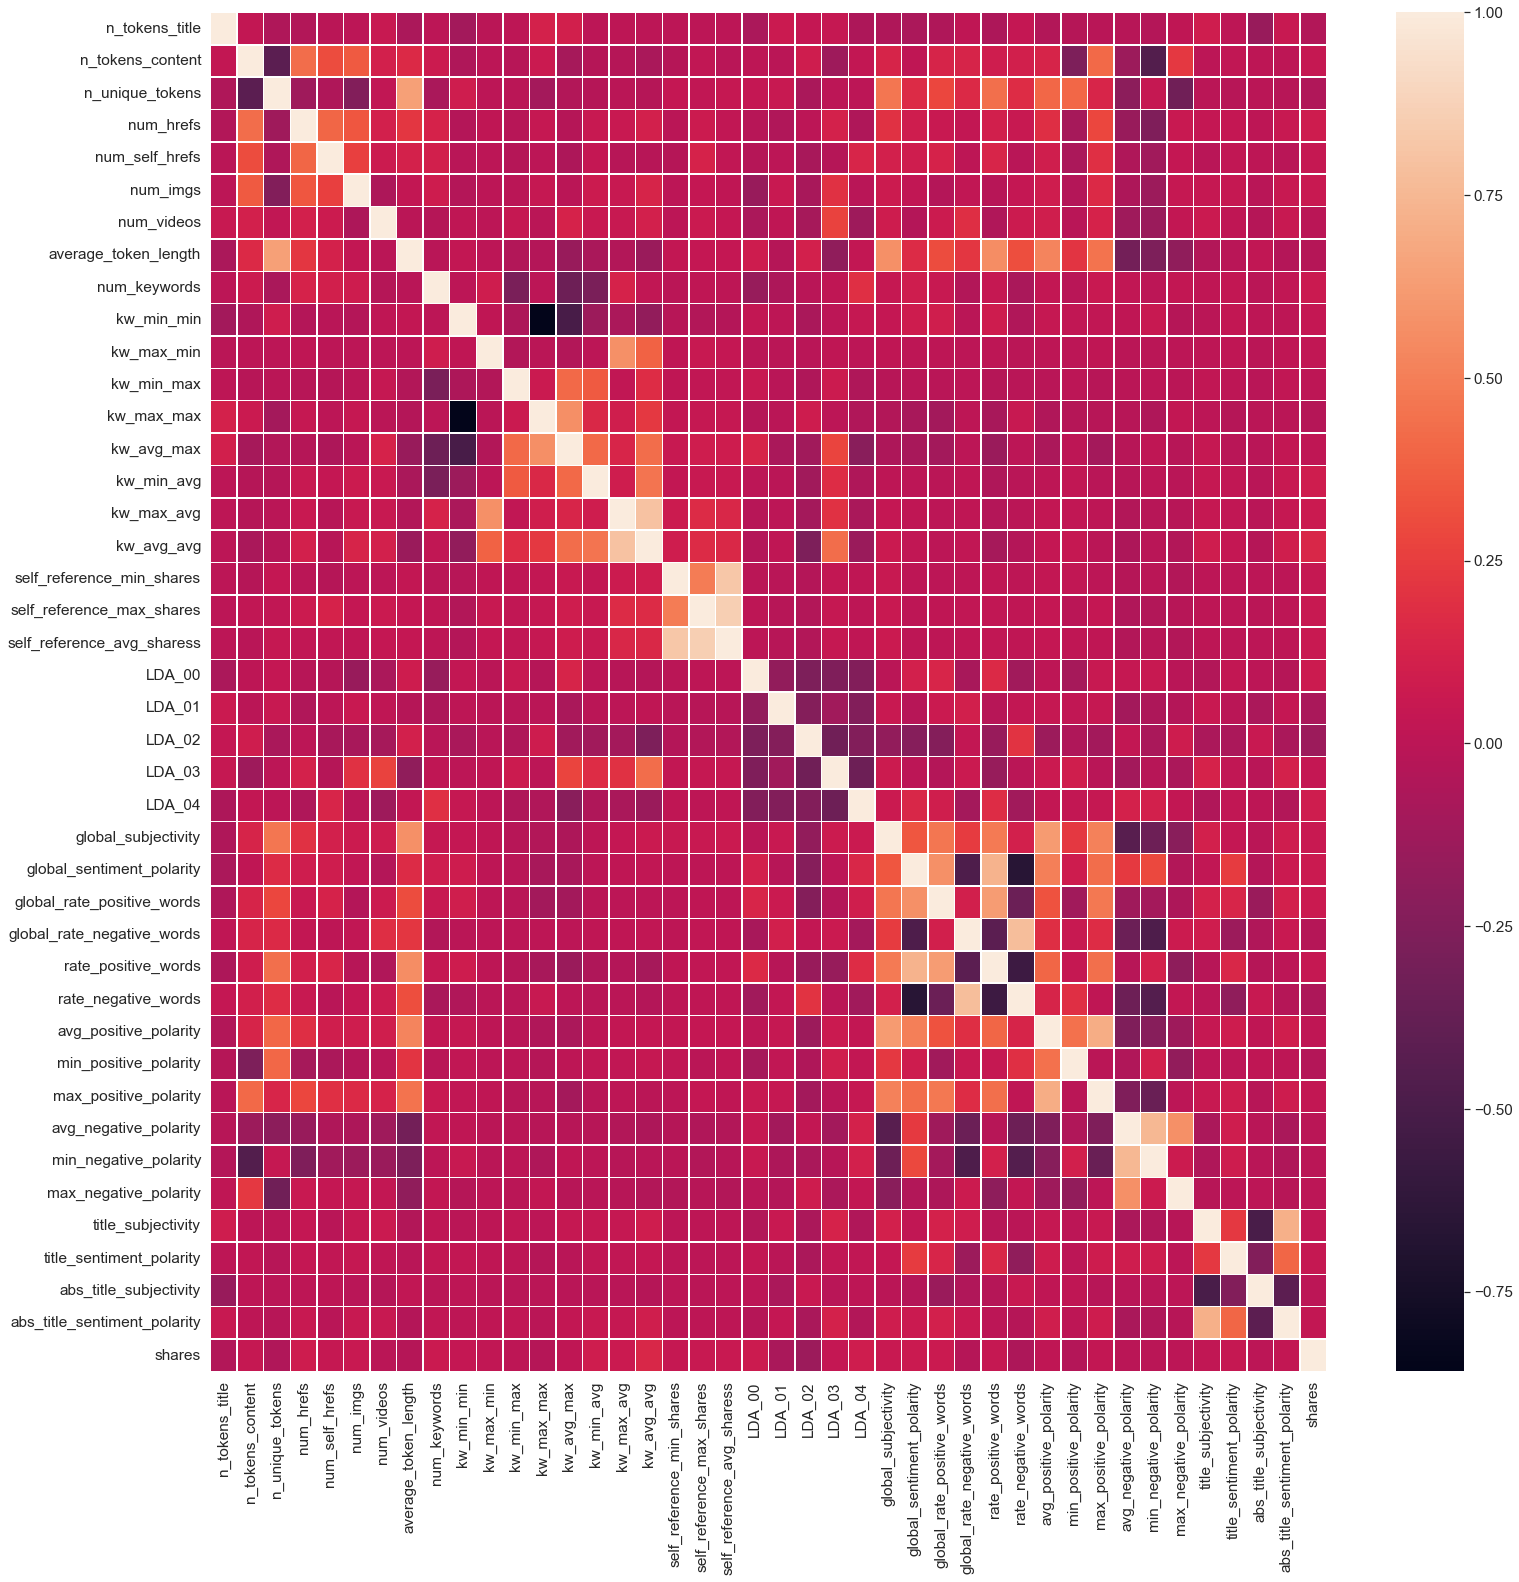

In [20]:
#Show the correlation matrix
corr = df3.corr()
plt.figure(figsize=(25,25))
sns.set(font_scale=1.4)
sns.heatmap(df3.corr(), linewidths=.5)

<h4><b> Exploratory Data Analysis Discussion</b></h4>

According to our correlation matrix, none of the explanatory variables are standing out as being very predictive of the response variable.  We were able to drop three variables that were highly correlated with each other with a ρ-value of 0.94 or greater.  We dropped all but two of the categorical variables since the dropped values produced about the same about of log shares.  We were able to drop some outlier values based on shares which helped the distribution to be more bell-shaped and not so skewed.   

<h3><b> Feature Selection & Dimensionality Reduction</b></h3>

In [21]:
#Remove kw worst, kw best, self_reference min and max shares, min and max positive polarity, and min and max negative 
#polarity.  We are only using the average for each of these features because it seemed redundant to use min, max, and 
#average about the same feature.
df4 = df3.drop(df3.columns[[9, 10, 11, 12, 13, 17, 18, 32, 33, 35, 36]], axis=1)

#View the data frame to ensure that the columns were removed
df4.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_avg,...,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,avg_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0.555556,0.028207,0.663594,0.021390,0.017241,0.007812,0.0,0.582024,0.444444,0.000277,...,0.084540,0.769231,0.230769,0.378636,0.650000,0.500000,0.406250,0.000000,0.187500,0.107656
1,0.388889,0.032844,0.604743,0.016043,0.008621,0.007812,0.0,0.611043,0.333333,0.000277,...,0.096807,0.733333,0.266667,0.286915,0.881250,0.000000,0.500000,1.000000,0.000000,0.129114
2,0.388889,0.027177,0.575130,0.016043,0.008621,0.007812,0.0,0.546334,0.555556,0.000277,...,0.058497,0.857143,0.142857,0.495833,0.533333,0.000000,0.500000,1.000000,0.000000,0.272595
3,0.388889,0.068393,0.503788,0.048128,0.000000,0.007812,0.0,0.547768,0.666667,0.000277,...,0.127845,0.666667,0.333333,0.385965,0.630303,0.000000,0.500000,1.000000,0.000000,0.218040
4,0.611111,0.138073,0.415646,0.101604,0.163793,0.156250,0.0,0.582331,0.666667,0.000277,...,0.074840,0.860215,0.139785,0.411127,0.779808,0.454545,0.568182,0.090909,0.136364,0.091653


In [22]:
# Create correlation matrix
corr_matrix = df3.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

print(upper)

                              n_tokens_title  n_tokens_content  \
n_tokens_title                           NaN          0.031569   
n_tokens_content                         NaN               NaN   
n_unique_tokens                          NaN               NaN   
num_hrefs                                NaN               NaN   
num_self_hrefs                           NaN               NaN   
num_imgs                                 NaN               NaN   
num_videos                               NaN               NaN   
average_token_length                     NaN               NaN   
num_keywords                             NaN               NaN   
kw_min_min                               NaN               NaN   
kw_max_min                               NaN               NaN   
kw_min_max                               NaN               NaN   
kw_max_max                               NaN               NaN   
kw_avg_max                               NaN               NaN   
kw_min_avg

In [23]:
# Find features with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
print(); print(to_drop)


['kw_max_max', 'kw_avg_avg', 'self_reference_avg_sharess', 'rate_positive_words', 'rate_negative_words', 'min_negative_polarity', 'abs_title_sentiment_polarity']


In [24]:
# Drop features 
df3.drop(to_drop, axis=1, inplace=True)

<h3>Backwards Stepwise</h3>

In [25]:
x_columns = ["n_tokens_content",
         "n_unique_tokens",
         "num_hrefs",
         "num_videos",      
         "num_keywords",
         "kw_min_avg",
         "kw_max_avg",
         "self_reference_avg_sharess",
         "global_subjectivity",
         "global_sentiment_polarity",
         "global_rate_positive_words",
         "global_rate_negative_words",
         "avg_positive_polarity",
         "avg_negative_polarity",
         "title_subjectivity",
         "title_sentiment_polarity",
         "abs_title_subjectivity"]
y = df4["shares"]

In [26]:
x=df4[x_columns]

In [27]:
df4.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,kw_min_avg,...,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,avg_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,0.555556,0.028207,0.663594,0.021390,0.017241,0.007812,0.0,0.582024,0.444444,0.000277,...,0.084540,0.769231,0.230769,0.378636,0.650000,0.500000,0.406250,0.000000,0.187500,0.107656
1,0.388889,0.032844,0.604743,0.016043,0.008621,0.007812,0.0,0.611043,0.333333,0.000277,...,0.096807,0.733333,0.266667,0.286915,0.881250,0.000000,0.500000,1.000000,0.000000,0.129114
2,0.388889,0.027177,0.575130,0.016043,0.008621,0.007812,0.0,0.546334,0.555556,0.000277,...,0.058497,0.857143,0.142857,0.495833,0.533333,0.000000,0.500000,1.000000,0.000000,0.272595
3,0.388889,0.068393,0.503788,0.048128,0.000000,0.007812,0.0,0.547768,0.666667,0.000277,...,0.127845,0.666667,0.333333,0.385965,0.630303,0.000000,0.500000,1.000000,0.000000,0.218040
4,0.611111,0.138073,0.415646,0.101604,0.163793,0.156250,0.0,0.582331,0.666667,0.000277,...,0.074840,0.860215,0.139785,0.411127,0.779808,0.454545,0.568182,0.090909,0.136364,0.091653


In [28]:
# creating function to get model statistics
 
import statsmodels.api as sm
def get_stats():
    X = df4[x_columns]
    results = sm.OLS(y, X).fit()
    print(results.summary())
 
get_stats()

                                 OLS Regression Results                                
Dep. Variable:                 shares   R-squared (uncentered):                   0.706
Model:                            OLS   Adj. R-squared (uncentered):              0.706
Method:                 Least Squares   F-statistic:                              4948.
Date:                Sun, 10 Oct 2021   Prob (F-statistic):                        0.00
Time:                        23:45:54   Log-Likelihood:                          7120.4
No. Observations:               35103   AIC:                                 -1.421e+04
Df Residuals:                   35086   BIC:                                 -1.406e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

All variables with a p-value higher than 0.05 were eliminated until the variables above remained.

<h4>Principal Components Analysis (PCA)</h4>

In [29]:
# load PCA + SVM classifier ("SVC") + cross validation functions
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [30]:
#Assign the response variable to a Python object
y = df[" shares"]

# split the data into training + testing subsets
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.4, random_state=0)

# create an instance of a PCA model +
# set the number of components you want to retain
pca = PCA(n_components=2)

# apply the PCA function to the training data
pca.fit(x_train)

# display the explained variance ratio for the principal components we've derived from the data
print(pca.explained_variance_ratio_)

[0.38335394 0.20360523]


The application of PCA to the data set has yielded two principal components, the first of which explains 38.33% of the variance in the Online News Popularity Data Set. The second principal component explains an additional 20.36% of the variance in the data. Therefore, the two principal components explain a total of 58% of the variance in the data set.

In [82]:
# display the singular values associated with the 2 principal components
print(pca.singular_values_)

[63.35174876 46.16928053]


In [79]:
# now apply the results of the PCA to the training data to transform it into 2 principal components per observation
X_t_train = pca.transform(x_train)

# apply the results of the PCA to the testing data to transform it into 2 principal components per observation
X_t_test = pca.transform(x_test)

# create an instance of an SVM classifier
clf = SVC()

# fit the SVM classifier to the transformed training data + the response data
clf.fit(X_t_train, y_train)

# check the accuracy of the SVM classifier using the transformed explanatory variables + the response variable
print ('score', clf.score(X_t_test, y_test) )

score 0.06708446090300527


Our SVM classifier has achieved an accuracy score of 6% when applied to the two principal components we derived from the Online News Popularity Data Set data. 

<h3>Regression Model Evaluation</h3>

In [31]:
#loading linear regression f(x) from sklearn 'linear model' sub-library
from sklearn.linear_model import LinearRegression
 
#loading the cross_val_score f(x) from the sklearn.model_selection module
from sklearn.model_selection import cross_val_score
 
#loading the train_test_split f(x)
from sklearn.model_selection import train_test_split

In [36]:
#now to split our first sets of data into training and testing subsets
#we will set aside only 20% of our data for testing purposes
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
 
#checking results
print(len(x_train))

print(len(x_test))
 
#We will be using 10-fold cross validation since our data set is rather large (approx 36,000 rows).

28082
7021


In [39]:
# Assigning the model function you want to use to a variable
LRmodel = LinearRegression()
 
# fit the model using 10-fold cross validation
scores = cross_val_score(LRmodel, x_train, y_train, cv=10)

In [40]:
# print out the R^2 metrics derived from the K-fold cross validation of our linear regression model
print(scores)
 
np.mean(scores)

[0.0337636  0.03682767 0.02294708 0.02359889 0.03358912 0.03236258
 0.03632107 0.03653808 0.02748592 0.04353989]


0.03269738995445011

<h3>Conclusion</h3>

Upon looking at the data set, we deemed particular attributes redundant. Weekday binary encoders were reduced down to “is weekend”, as our box plots in our EDA had shown only a significant difference was seen whether a Mashable article was posted on the weekend (Saturday and Sunday) or not.
 
In addition, seeing attributes such as “worst”, “best” and “average” keyword attributes led us to only keep average measures. This was also our case for “self-reference” and “polarity”.
 
After utilizing backwards stepwise regression we were able to rule out what we believed were arbitrary dimensions from our data set. We discarded any attributes with a p-value higher than 0.05, as per our readings from M4, A9 suggested.
 
We didn’t achieve a very good variance score from our two best principal components (a combined ratio of about 58%), and our SVM classifier was only able to derive a score of 0.06 (6%). Nevertheless, we ran our 10-fold cross validated linear regression, and came up with an R^2 of 3% which means that the variables selected by PCA were not predictive of our response variable.